In [105]:

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Beatles"
!ls
basepath = '.'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Beatles
george	john  paul  ringo


In [106]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import models, optimizers, layers
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

In [107]:
john_folder = os.path.join(basepath, 'john')
paul_folder = os.path.join(basepath, 'paul')
george_folder = os.path.join(basepath, 'george')
ringo_folder = os.path.join(basepath, 'ringo')

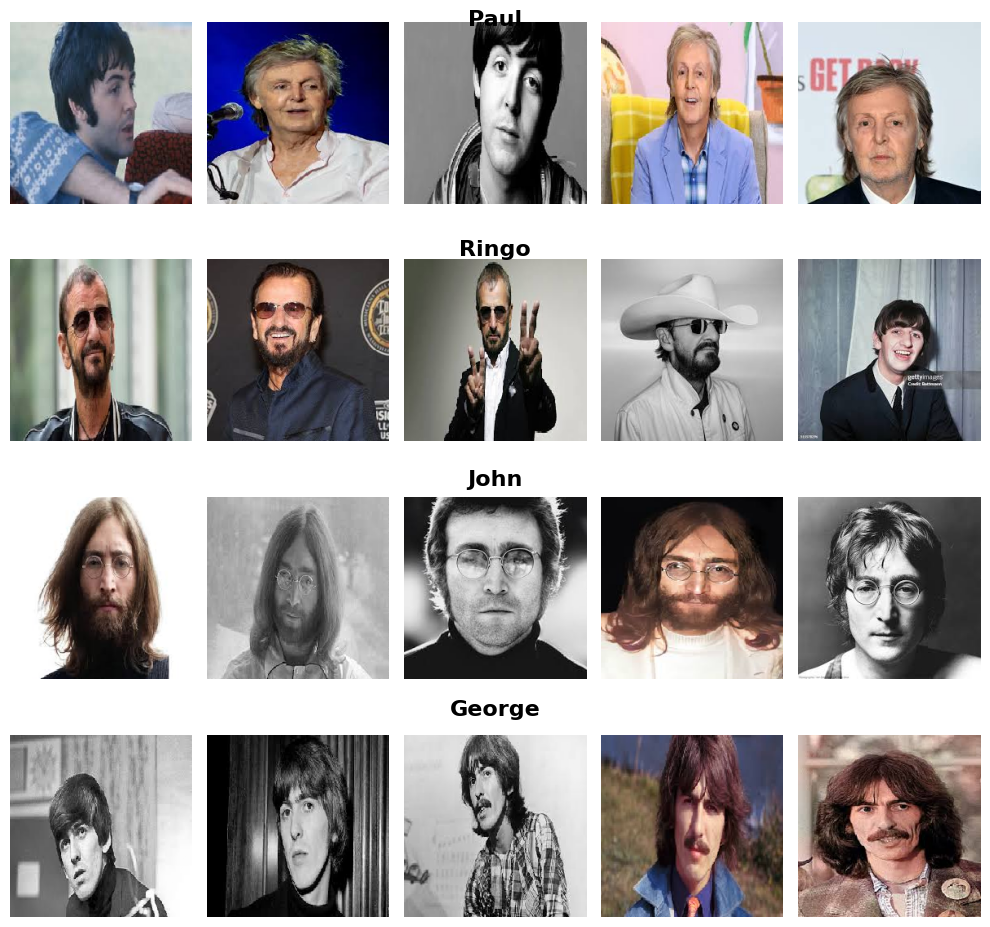

In [108]:
image_size = (224, 224)

john_images = []
paul_images = []
george_images = []
ringo_images = []


def preprocess(folder_name):
    images = []
    for filename in os.listdir(folder_name):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_name, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
    return np.array(images)

john_images = preprocess(os.path.join(basepath, 'john'))
paul_images = preprocess(os.path.join(basepath, 'paul'))
george_images = preprocess(os.path.join(basepath, 'george'))
ringo_images = preprocess(os.path.join(basepath, 'ringo'))

label_map = {'john': 0, 'paul': 1, 'george': 2, 'ringo': 3}

X = np.concatenate([john_images, paul_images, george_images, ringo_images], axis=0)
y = np.array(
    [label_map['john']] * len(john_images) +
    [label_map['paul']] * len(paul_images) +
    [label_map['george']] * len(george_images) +
    [label_map['ringo']] * len(ringo_images)
)

X, y = shuffle(X, y)

y = to_categorical(y, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

f, axarr = plt.subplots(4, 5, figsize=(10, 10))

beatles = ['Paul', 'Ringo', 'John', 'George']
image_sets = [paul_images, ringo_images, john_images, george_images]

for row in range(4):
    for col in range(5):
        axarr[row][col].imshow(image_sets[row][col].squeeze())
        axarr[row][col].axis('off')

for row, name in enumerate(beatles):
    ypos = 0.95 - row * 0.23
    f.text(0.5, ypos, name, ha='center', va='center', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

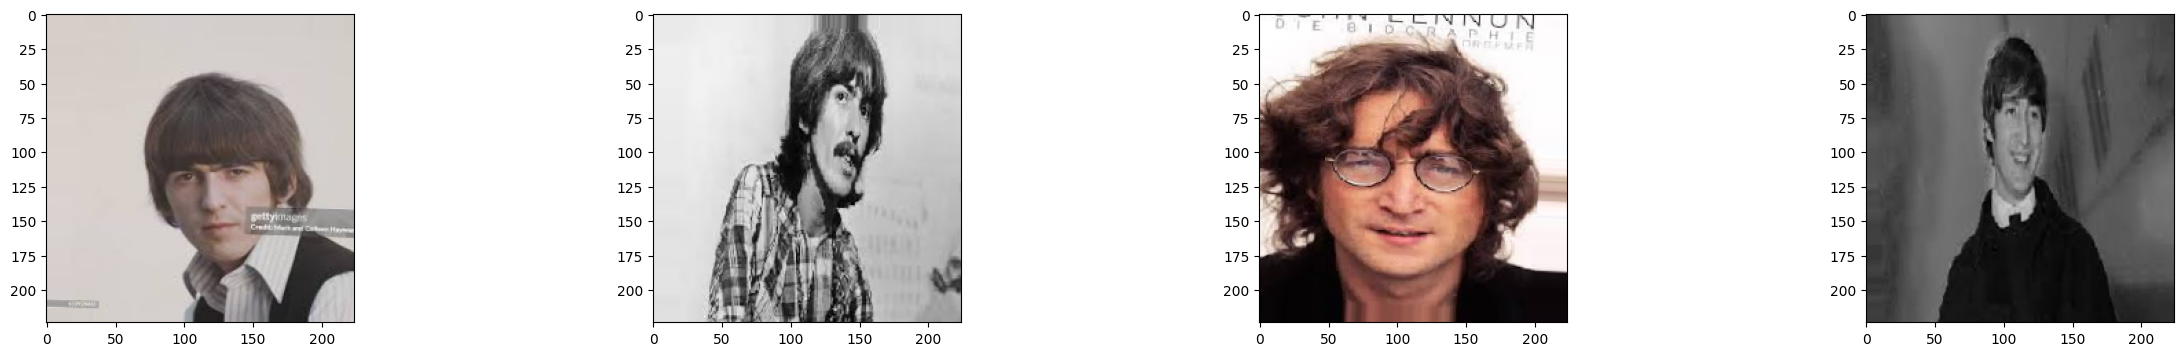

In [109]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=24)

images = next(train_generator)[0]

f, axarr = plt.subplots(1, 4, figsize=(30, 4))

for i in range(4) :
  axarr[i].imshow(images[i])

In [110]:
def build_model(input_shape=(224, 224, 1), num_classes=4):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_model()
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,372 (49.36 MB)

 Trainable params: 12,938,372 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_base.layers:
    layer.trainable = False

x = vgg_base.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=vgg_base.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 0.2659 - loss: 1.6320 - val_accuracy: 0.4478 - val_loss: 1.2501
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 409ms/step - accuracy: 0.4258 - loss: 1.2590 - val_accuracy: 0.5249 - val_loss: 1.1561
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 437ms/step - accuracy: 0.5426 - loss: 1.1334 - val_accuracy: 0.5672 - val_loss: 1.0529
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - accuracy: 0.5573 - loss: 1.0473 - val_accuracy: 0.6095 - val_loss: 0.9803
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 375ms/step - accuracy: 0.5666 - loss: 1.0236 - val_accuracy: 0.6169 - val_loss: 0.9600
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 384ms/step - accuracy: 0.6313 - loss: 0.9286 - val_accuracy: 0.6095 - val_loss: 0.9402
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.6316 - loss: 0.9062 - val_accuracy: 0.6592 - val_loss: 0.8906
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 380ms/step - accuracy: 0.6441 - loss: 0.8848 - val_accu

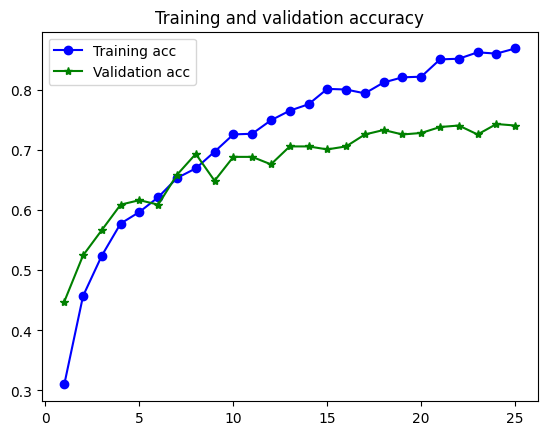

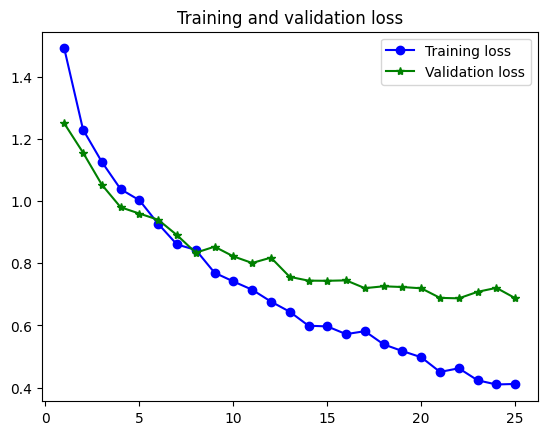

In [112]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=(X_val, y_val)
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'g*-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'g*-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [113]:
class_names = ['John', 'Paul', 'George', 'Ringo']

def plot_image(i, predictions_array, true_label, img):
    true_label_idx = np.argmax(true_label[i])
    predicted_label_idx = np.argmax(predictions_array)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[i])

    color = 'blue' if predicted_label_idx == true_label_idx else 'red'
    plt.xlabel("{} {:2.0f}% (True: {})".format(
        class_names[predicted_label_idx],
        100*np.max(predictions_array),
        class_names[true_label_idx]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label_idx = np.argmax(true_label[i])

    plt.grid(False)
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    thisplot[true_label_idx].set_color('blue')
    thisplot[np.argmax(predictions_array)].set_color('red')



13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step


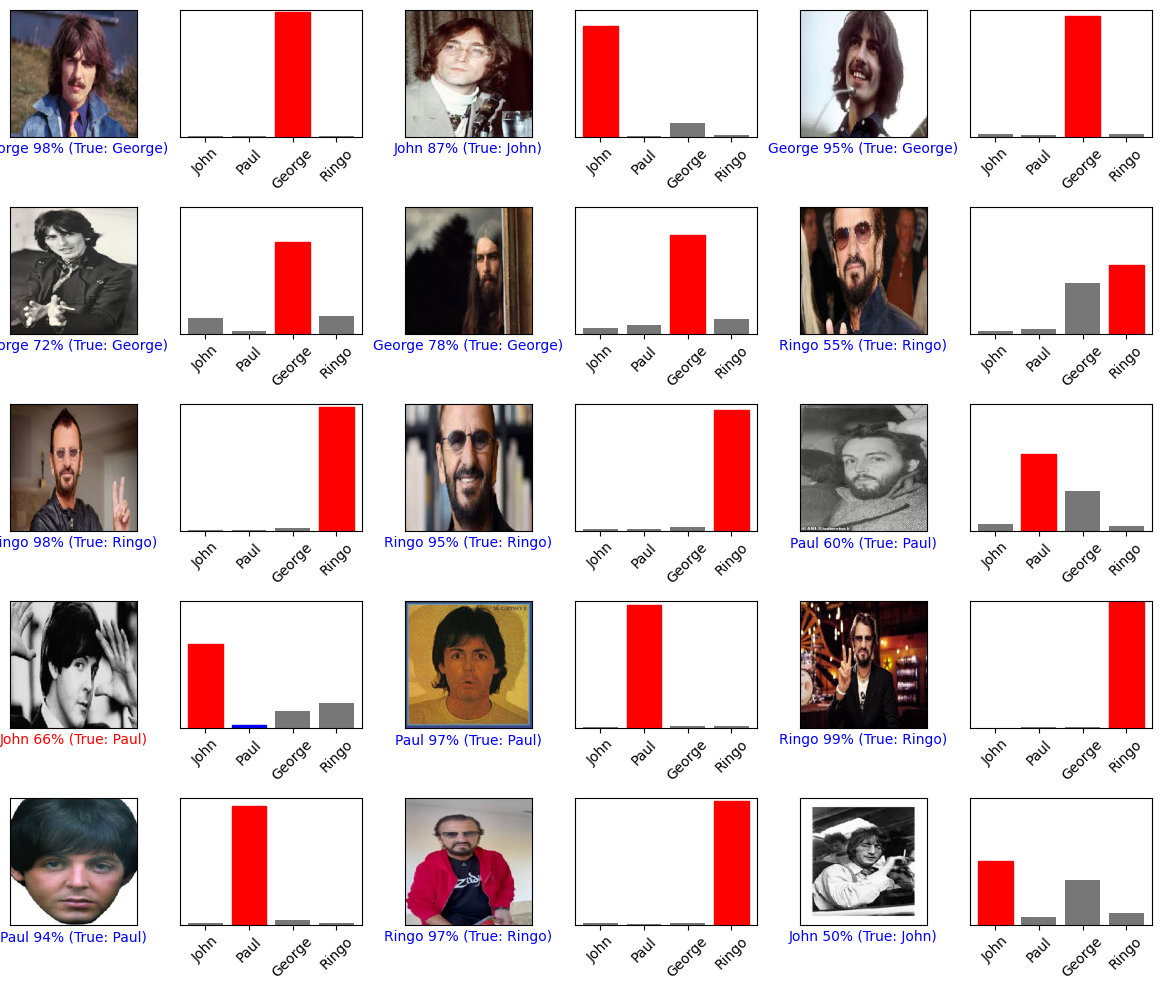

In [114]:
predictions = model.predict(X_val)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_val, X_val)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_val)
plt.tight_layout()
plt.show()


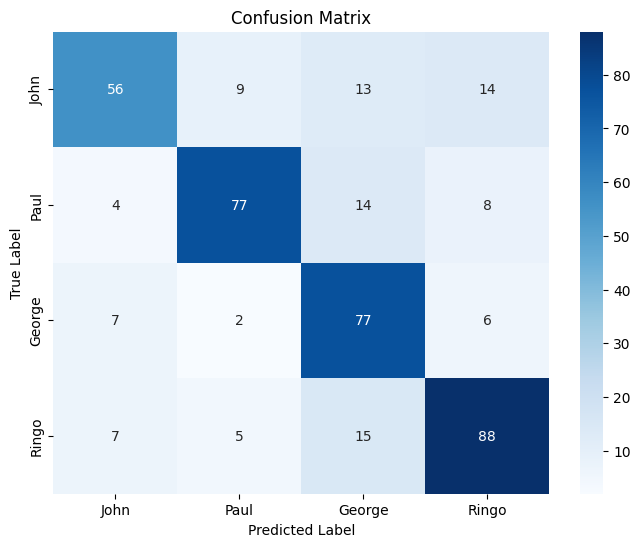

In [115]:
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)

class_names = ['John', 'Paul', 'George', 'Ringo']
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()